## INSURANCE PROJECT ANALYSIS PART II - STRATIFIED SAMPLING

## Data Dictionary

1.  DATE_FOR              -  Date of Record Processing

2.  RTD_ST_CD             -  Rated State of Policy  

3.  CustomerSegment       -  Rated State of Policy

4.  Tenure                -  Years of Tenure with the Company

5.  Age                   -  Age of Policyholder

6.  MART_STATUS           -  Marital Status of Policyholder

7.  GENDER                -  Gender of Primary Insured

8.  CHANNEL1_6M           -  # payments made through Channel1 in the last 6 months

9.  CHANNEL2_6M           -  # payments made through Channel2 in the last 6 months

10. CHANNEL3_6M           -  # payments made through Channel3 in the last 6 months

11. CHANNEL4_6M           -  # payments made through Channel4 in the last 6 months

12. CHANNEL5_6M           -  # payments made through Channel5 in the last 6 months

13. METHOD1_6M            -  # payments made with method 1 in the last 6 months (irrespective of channel)

14. RECENT_PAYMENT        -  Payment made in the last 15 days (1/0)

15. PAYMENTS_6M           -  Total payments in the last 6 months                               

16. CHANNEL1_3M           -  # payments made through Channel1 in the last 3 months

17. CHANNEL2_3M           -  # payments made through Channel2 in the last 3 months

18. CHANNEL3_3M           -  # payments made through Channel3 in the last 3 months

19. CHANNEL4_3M           -  # payments made through Channel4 in the last 3 months

20. CHANNEL5_3M           -  # payments made through Channel5 in the last 3 months

21. CHANNEL2_3M           -  # payments made through Channel2 in the last 3 months

22. METHOD1_3M            -  # payments made with method 1 in the last 3 months (irrespective of channel)

23. PAYMENTS_3M           -  Total payments in the last 3 months    

24. NOT_DI_3M             -  Had this customer been enrolled in automated payments in the last 3 months? (1/0)

25. NOT_DI_6M             -  Had this customer been enrolled in automated payments in the last 6 months? (1/0)

26. EVENT1_30_FLAG        -  Had this customer been sent a cancellation notice in the last 30 days? (1/0)

27. EVENT2_90_SUM         -  How many cancellation notices have been sent in the last 90 days?)

28. LOGINS                -  How many times has this policy logged into self-service online in the last 30 days?

29. POLICYPURCHASECHANNEL -  How was this policy purchased?(1/0)

30. Call_Flag             -  Was there a service payment call?(1/0) *TARGET VARIABLE*


## Insurance Dataset


In [4]:
# to handle datasets
import pandas as pd
import numpy as np

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set_color_codes()
sns.set(font_scale=1.25)

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Fitting SVM to the Training set
from sklearn.svm import SVC

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

# Fitting Neural Net to the Training set
from sklearn.neural_network import MLPClassifier

# Fitting K-Nearest Neighor  to the Training set
from sklearn.neighbors import KNeighborsClassifier

# Fitting Classification and Regression Trees  to the Training set
from sklearn.tree import DecisionTreeClassifier

#Classification Matrix
from sklearn.metrics import classification_report,confusion_matrix

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [5]:
# load dataset
data = pd.read_csv('ChrisBennett_Data1.csv')
data.head()

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,0.0,5.0,0.0,0.0,6.0,0,0,1,0,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,0.0,0.0,6.0,0.0,6.0,0,3,0,0,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,0,0,6,0,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


### Oversampling the events

In [13]:
# Subsetting all the events
events = data[data.Call_Flag==1]

In [16]:
# Checking New Dataset
events.head()
events.Call_Flag.unique()

array([1], dtype=int64)

In [23]:
# Assessing the dimensions of the events dataset
events.shape

(4764, 29)

In [17]:
# Subsetting all the non-events
non_events = data[data.Call_Flag==0]

In [21]:
# Checking New Dataset
non_events.head()
non_events.Call_Flag.unique()

array([0], dtype=int64)

In [26]:
# Assessing the dimensions of the non_events dataset
non_events.shape

(125322, 29)

In [25]:
# Taking a Random Sample of 4764 observations from the non-events dataset
# you can use random_state for reproducibility
non_events1 =non_events.sample(n=4764, random_state=2)

In [27]:
# Assessing the dimensions of the non_events1 dataset
non_events1.shape

(4764, 29)

#### Combining the events and non_events1 datasets

In [31]:
#Combining the events and non-events datasets
newdata = events.append(non_events1, ignore_index=True )

In [32]:
# Checking the newdata set
newdata.head()

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/13/2014,ST_S8,1,18.735113,74.313484,MS_S4,F,0.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,0,0,0,2,0,2,2,0,0,0,0,0,0,1
1,5/13/2014,ST_S34,1,16.024641,43.613963,MS_S4,F,0.0,5.0,0.0,0.0,0.0,5.0,0.0,5.0,0,3,0,0,0,3,3,0,0,0,0,0,0,1
2,5/17/2014,ST_S0,1,16.057495,47.827515,MS_S2,M,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,5/17/2014,ST_S0,1,16.057495,47.827515,MS_S2,M,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5/16/2014,ST_S0,1,16.016427,54.784394,MS_S1,F,0.0,5.0,0.0,1.0,0.0,0.0,0.0,6.0,0,3,0,0,0,0,3,0,0,0,0,0,0,1


In [33]:
# Assessing the dimensions of the newdataset
newdata.shape

(9528, 29)

In [34]:
# Checking unique values
newdata.Call_Flag.unique()

array([1, 0], dtype=int64)

## Types of variables

Let's go ahead and find out what types of variables there are in this dataset

In [35]:
# let's inspect the type of variables in pandas
newdata.dtypes

DATE_FOR                  object
RTD_ST_CD                 object
CustomerSegment            int64
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M              float64
CHANNEL2_6M              float64
CHANNEL3_6M              float64
CHANNEL4_6M              float64
CHANNEL5_6M              float64
METHOD1_6M               float64
RECENT_PAYMENT           float64
PAYMENTS_6M              float64
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT1_30_FLAG             int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtype: object

There are a mixture of categorical and numerical variables. Numerical are those of type int and float. Categorical those of type object. Also, some variables that should be of type int appear as float(CHANNEL1_6M, CHANNEL2_6M, CHANNEL3_6M, CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M). Those variables will be recasted as type int.

## Exploring missing values in the dataset



In [36]:
newdata.isnull().mean()

DATE_FOR                 0.000000
RTD_ST_CD                0.000000
CustomerSegment          0.000000
Tenure                   0.000000
Age                      0.000000
MART_STATUS              0.000000
GENDER                   0.000000
CHANNEL1_6M              0.007032
CHANNEL2_6M              0.007032
CHANNEL3_6M              0.007032
CHANNEL4_6M              0.007032
CHANNEL5_6M              0.007032
METHOD1_6M               0.007032
RECENT_PAYMENT           0.007032
PAYMENTS_6M              0.007032
CHANNEL1_3M              0.000000
CHANNEL2_3M              0.000000
CHANNEL3_3M              0.000000
CHANNEL4_3M              0.000000
CHANNEL5_3M              0.000000
METHOD1_3M               0.000000
PAYMENTS_3M              0.000000
NOT_DI_3M                0.000000
NOT_DI_6M                0.000000
EVENT1_30_FLAG           0.000000
EVENT2_90_SUM            0.000000
LOGINS                   0.000000
POLICYPURCHASECHANNEL    0.000000
Call_Flag                0.000000
dtype: float64

In [37]:
print('Total policyholders in the company: ',newdata.shape[0])
print('Percentage of data without missing values: ',newdata.dropna().shape[0]/ np.float(newdata.shape[0]))
print('Percentage of data with missing values: ', (1- (newdata.dropna().shape[0]/ np.float(newdata.shape[0]))))

Total policyholders in the company:  9528
Percentage of data without missing values:  0.992968094038623
Percentage of data with missing values:  0.0070319059613770385


As is evident above the percentage of the data that has missing values is less than 1%. Eight of variables are shown to have approx. 0.7% of the observations missing. Therefore, we will remove those observations from the dataset, instead of imputing the missing values.

## Dropping missing values


In [39]:
data1 = newdata.dropna()
data1.isnull().mean()

DATE_FOR                 0.0
RTD_ST_CD                0.0
CustomerSegment          0.0
Tenure                   0.0
Age                      0.0
MART_STATUS              0.0
GENDER                   0.0
CHANNEL1_6M              0.0
CHANNEL2_6M              0.0
CHANNEL3_6M              0.0
CHANNEL4_6M              0.0
CHANNEL5_6M              0.0
METHOD1_6M               0.0
RECENT_PAYMENT           0.0
PAYMENTS_6M              0.0
CHANNEL1_3M              0.0
CHANNEL2_3M              0.0
CHANNEL3_3M              0.0
CHANNEL4_3M              0.0
CHANNEL5_3M              0.0
METHOD1_3M               0.0
PAYMENTS_3M              0.0
NOT_DI_3M                0.0
NOT_DI_6M                0.0
EVENT1_30_FLAG           0.0
EVENT2_90_SUM            0.0
LOGINS                   0.0
POLICYPURCHASECHANNEL    0.0
Call_Flag                0.0
dtype: float64

As we can see above, the missing cases have been eliminated from the dataset.

## Changing incorrect data types


In [40]:
# Coverting variables types from float to int
Vars_to_be_Converted = ['CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M','CHANNEL5_6M','METHOD1_6M','RECENT_PAYMENT','PAYMENTS_6M' ]
for var in Vars_to_be_Converted:
    data1[var] = data1[var].astype('int') # parses the above variable to int type

print(data1.dtypes)

DATE_FOR                  object
RTD_ST_CD                 object
CustomerSegment            int64
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M                int32
CHANNEL2_6M                int32
CHANNEL3_6M                int32
CHANNEL4_6M                int32
CHANNEL5_6M                int32
METHOD1_6M                 int32
RECENT_PAYMENT             int32
PAYMENTS_6M                int32
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT1_30_FLAG             int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtype: object


## Exploring the data (numerical variables) - Descriptive Statistics


In [41]:
data1.describe()

,CustomerSegment,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.000000,9461.0,9461.000000,9461.000000,9461.000000,9461.000000
mean,1.310221,8.024447,49.673784,0.314449,1.024733,0.540006,1.152204,0.328929,2.057711,0.077793,4.543072,0.134552,0.501955,0.265511,0.575732,0.160871,1.007504,2.237713,0.074199,0.097453,0.0,0.189832,0.634394,0.097347,0.499419
std,0.552383,7.329348,14.400020,1.201634,1.805799,1.475670,1.885654,1.240881,2.613441,0.267860,2.218643,0.588806,0.973714,0.779564,1.056490,0.643323,1.412885,1.338580,0.262109,0.296589,0.0,0.511295,1.770034,0.296445,0.500026
min,1.000000,0.057495,17.724846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.644764,38.729637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,6.261465,50.187543,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,2.000000,10.986995,59.770021,0.000000,1.000000,0.000000,2.000000,0.000000,4.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000
max,3.000000,51.600274,96.191650,12.000000,12.000000,10.000000,18.000000,11.000000,24.000000,1.000000,24.000000,6.000000,7.000000,4.000000,8.000000,7.000000,11.000000,11.000000,1.000000,1.000000,0.0,4.000000,43.000000,1.000000,1.000000


## Deleting variables that lack meaningful information


The variable DATE_FOR represents the date of record processing and is not very meaningful and thus will be deleted. Also, the variable EVENT1_30_FLAG, which represents whether a policyholder was sent a cancellation in the last 30 days and is a categorical variable taking values of 1's and 0's, has all 0's and therefore is not very useful for our purposes and will be deleted as well. 
            

In [42]:
# Dropping insignificant variables
var_to_be_dropped = ['DATE_FOR', 'EVENT1_30_FLAG']
for var in var_to_be_dropped:
    data1.drop(labels=[var], inplace =True, axis = 1)
     

In [43]:
print(data1.dtypes)

RTD_ST_CD                 object
CustomerSegment            int64
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M                int32
CHANNEL2_6M                int32
CHANNEL3_6M                int32
CHANNEL4_6M                int32
CHANNEL5_6M                int32
METHOD1_6M                 int32
RECENT_PAYMENT             int32
PAYMENTS_6M                int32
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtype: object


*As you can see above the variables DATE_FOR and EVENT1_30_FLAG have been removed from the dataset.*

In [44]:
# find categorical variables
categorical = [var for var in data1.columns if data1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [45]:
# find numerical variables
numerical = [var for var in data1.columns if data1[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 24 numerical variables


In [46]:
# view of categorical variables
data1[categorical].head()

,RTD_ST_CD,MART_STATUS,GENDER
0,ST_S8,MS_S4,F
1,ST_S34,MS_S4,F
2,ST_S0,MS_S2,M
3,ST_S0,MS_S2,M
4,ST_S0,MS_S1,F


In [47]:
# view of numerical variables
data1[numerical].head()

,CustomerSegment,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,1,18.735113,74.313484,0,0,0,4,0,4,0,4,0,0,0,2,0,2,2,0,0,0,0,0,1
1,1,16.024641,43.613963,0,5,0,0,0,5,0,5,0,3,0,0,0,3,3,0,0,0,0,0,1
2,1,16.057495,47.827515,0,0,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,16.057495,47.827515,0,0,0,2,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,16.016427,54.784394,0,5,0,1,0,0,0,6,0,3,0,0,0,0,3,0,0,0,0,0,1


* 16 Discrete variables: CHANNEL1_6M, CHANNEL2_6M, CHANNEL3_6M, CHANNEL4_6M, CHANNEL5_6M, CHANNEL1_3M, CHANNEL2_3M, CHANNEL3_3M  CHANNEL4_3M, CHANNEL5_3M, METHOD1_6M, METHOD1_3M, PAYMENTS_6M, PAYMENTS_3M, LOGINS, CustomerSegment
* 2 continuous variables: Tenure and Age
* 6 binary variables: POLICYPURCHASECHANNEL, NOT_D1_6M, NOT_D1_3M, RECENT_PAYMENT, EVENT1_30_FLAG and Call_Flag (Target Variable).

In [48]:
# let's visualise the values of the discrete variables
for var in ['CHANNEL1_6M',  'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M', 'CHANNEL5_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M', 'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_6M', 'METHOD1_3M', 'PAYMENTS_6M', 'PAYMENTS_3M', 'LOGINS', 'CustomerSegment']:
    print(var, ' values: ', data1[var].unique())

CHANNEL1_6M  values:  [ 0  1  2  6  4  5  3  7  8  9 11 10 12]
CHANNEL2_6M  values:  [ 0  5  4  6  3  1  2  7 10  8 12 11]
CHANNEL3_6M  values:  [ 0  6  4  3  1  5  2  8  7 10]
CHANNEL4_6M  values:  [ 4  0  2  1  5  6  3  7 12  8 14 10 18 13 11  9]
CHANNEL5_6M  values:  [ 0  1  4  2  6  3  5  7  9 10  8 11]
CHANNEL1_3M  values:  [0 3 2 1 4 5 6]
CHANNEL2_3M  values:  [0 3 2 1 4 6 5 7]
CHANNEL3_3M  values:  [0 3 1 2 4]
CHANNEL4_3M  values:  [2 0 3 1 4 5 6 8]
CHANNEL5_3M  values:  [0 2 1 3 4 6 5 7]
METHOD1_6M  values:  [ 4  5  2  0  1  6  7  3  8 12 10 14  9 11 15 16 13 17 18 24]
METHOD1_3M  values:  [ 2  3  0  1  4  6  5  8  7 11  9 10]
PAYMENTS_6M  values:  [ 4  5  2  6  1  7  3 12  8 14 11  9 10 18 13 15 16 17 24]
PAYMENTS_3M  values:  [ 2  3  0  4  5  1  6  8  7  9 11 10]
LOGINS  values:  [ 0  1  4  2  3  8  5 16 43  7  6 14 13 19 12  9 24 17 10 18 11 21 20 15 32
 28 26 27]
CustomerSegment  values:  [1 2 3]


## Correlation matrix for numerical variables - excluding binary variables

In [49]:
# Creating correlation matrix for numerical variables
corr_matrix = data1[numerical].corr()
corr_matrix.sort_values
corr_matrix

,CustomerSegment,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
CustomerSegment,1.000000,-0.296972,-0.226746,0.171374,-0.008329,-0.068851,0.104458,-0.068073,0.200461,0.029061,0.097906,0.152133,0.009583,-0.061438,0.112164,-0.065489,0.207091,0.119133,0.187072,0.214846,0.112974,0.011790,0.047309,0.081980
Tenure,-0.296972,1.000000,0.390313,-0.163975,0.104088,0.126274,-0.027136,0.103558,-0.212434,-0.022186,0.045278,-0.145279,0.077662,0.113951,-0.042925,0.096983,-0.209222,0.003475,-0.185504,-0.212809,-0.044858,-0.077359,-0.177655,-0.103933
Age,-0.226746,0.390313,1.000000,-0.169410,0.074922,0.184133,0.069765,0.014397,-0.224309,-0.055507,-0.065421,-0.149603,0.053725,0.170117,0.046651,0.015071,-0.220656,-0.083436,-0.175728,-0.200632,-0.098499,-0.198393,-0.166742,0.055507
CHANNEL1_6M,0.171374,-0.163975,-0.169410,1.000000,-0.102721,-0.086888,-0.028822,-0.063277,0.347928,0.054703,0.306989,0.914911,-0.081520,-0.077626,0.004846,-0.058197,0.325615,0.270159,0.790820,0.793151,0.082801,0.095507,0.106947,0.060385
CHANNEL2_6M,-0.008329,0.104088,0.074922,-0.102721,1.000000,-0.163450,-0.111777,-0.134022,0.127035,0.010883,0.215561,-0.092806,0.931267,-0.159353,-0.104097,-0.127086,0.125010,0.179228,-0.111972,-0.120358,0.066585,-0.165837,-0.101454,0.045673
CHANNEL3_6M,-0.068851,0.126274,0.184133,-0.086888,-0.163450,1.000000,-0.166263,-0.089104,-0.251235,-0.014293,0.113440,-0.079983,-0.142537,0.953220,-0.142281,-0.082387,-0.224824,0.110965,-0.092945,-0.099240,-0.078717,-0.115305,-0.066294,-0.178006
CHANNEL4_6M,0.104458,-0.027136,0.069765,-0.028822,-0.111777,-0.166263,1.000000,-0.141162,0.307746,0.002507,0.296638,-0.036632,-0.092221,-0.161824,0.904859,-0.134514,0.294094,0.253736,-0.023494,-0.005922,0.111247,-0.154256,-0.105743,0.416368
CHANNEL5_6M,-0.068073,0.103558,0.014397,-0.063277,-0.134022,-0.089104,-0.141162,1.000000,-0.180732,0.007285,0.116455,-0.058845,-0.120216,-0.083298,-0.122052,0.961542,-0.161367,0.101649,-0.068872,-0.076193,-0.036781,-0.012091,-0.024985,-0.208221
METHOD1_6M,0.200461,-0.212434,-0.224309,0.347928,0.127035,-0.251235,0.307746,-0.180732,1.000000,0.090078,0.466483,0.293913,0.138325,-0.235817,0.286666,-0.171760,0.932808,0.397512,0.247291,0.284590,0.178734,0.130542,0.083755,0.095801
RECENT_PAYMENT,0.029061,-0.022186,-0.055507,0.054703,0.010883,-0.014293,0.002507,0.007285,0.090078,1.000000,0.172058,0.056950,0.022924,-0.006285,0.028860,0.013863,0.112418,0.206682,0.090924,0.072218,0.166937,0.114842,0.017776,-0.117259


<div class = "alert As you might have observed, some of the numerical variables are nested variables; for example, CHANNEL1_3M is nested with CHANNEL1_6M; likewise, PAYMENTS_3M is nested with PAYMENTS_6M. This intuition is supported by the fact that those variables are shown to be highly correlated with each other in the above correlation matrix. This leads to multicollinearity issues, which become a problem for linear and logistic regression. Therefore, we will remove nested variables from the dataset. alert-danger">

<div class = "alert  beware  alert-danger">

## Take away from the correlation matrix

Note: There exist numerical variables that are highly correlated with each other, having a correlation of over 90%. These variables happen to be nested. For example, variable CHANNEL1_6M is nested within variable CHANNEL1_6M; likewise,variable PAYMENTS_3M is nested within variable PAYMENTS_6M. The fact that these variables are so highly correlated leads to multicollinearity issues with are a problem for the linear and logistic regression modeling techniques. Therefore, where variables are nested within other variables, those variables will be removed from the dataset.

## Deleting nested variables to address the multicollinearity problem

In [50]:
# Dropping nested variables: CHANNEL1_3M,CHANNEL2_3M, CHANNEL3_3M, CHANNEL4_3M, CHANNEL5_3M, PAYMENTS_3M, METHOD1_3M and NOT_DI_3M

nexted_var_dropped = ['CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M', 'CHANNEL4_3M', 'CHANNEL5_3M', 'PAYMENTS_3M', 'NOT_DI_3M','METHOD1_3M' ]
for var in nexted_var_dropped:
    data1.drop(labels=[var], inplace =True, axis = 1)

In [51]:
# Inspecting the dataset after dropping nexted variables
data1. head()

,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,ST_S8,1,18.735113,74.313484,MS_S4,F,0,0,0,4,0,4,0,4,0,0,0,0,1
1,ST_S34,1,16.024641,43.613963,MS_S4,F,0,5,0,0,0,5,0,5,0,0,0,0,1
2,ST_S0,1,16.057495,47.827515,MS_S2,M,0,0,0,2,0,2,0,2,0,0,0,0,1
3,ST_S0,1,16.057495,47.827515,MS_S2,M,0,0,0,2,0,2,0,2,0,0,0,0,1
4,ST_S0,1,16.016427,54.784394,MS_S1,F,0,5,0,1,0,0,0,6,0,0,0,0,1


## Examining Outliers

In [52]:
# find new categorical variables
categorical = [var for var in data1.columns if data1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [53]:
# find numerical variables
numerical = [var for var in data1.columns if data1[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 16 numerical variables


*After deleting the nested variables, the number of categorical variables remain at , but the number of numerical variables shrank to 16, down from 24.*

In [54]:
# Finding new numerical variables with the binary variables
numerical1 = [var for var in numerical if var not in['Call_Flag', 'RECENT_PAYMENT', 'POLICYPURCHASECHANNEL','NOT_DI_6M']]
numerical1

['CustomerSegment',
 'Tenure',
 'Age',
 'CHANNEL1_6M',
 'CHANNEL2_6M',
 'CHANNEL3_6M',
 'CHANNEL4_6M',
 'CHANNEL5_6M',
 'METHOD1_6M',
 'PAYMENTS_6M',
 'EVENT2_90_SUM',
 'LOGINS']

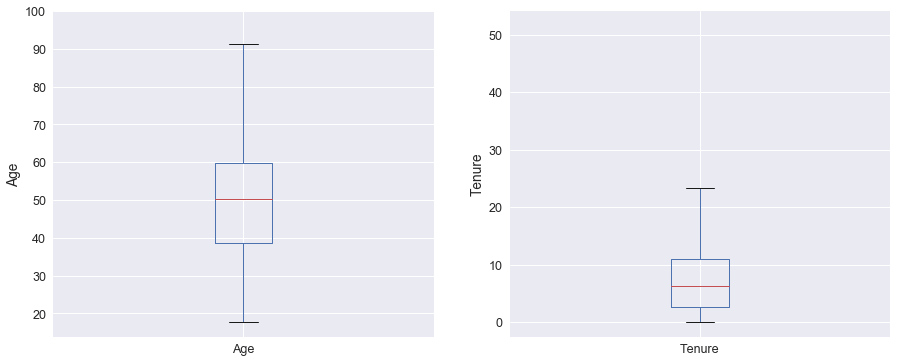

In [55]:
# let's make boxplots to visualise outliers in the continuous variables 
# Tenure and Age

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data1.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = data1.boxplot(column='Tenure')
fig.set_title('')
fig.set_ylabel('Tenure')

*Notably the above boxplots reveal that the variables Age and Tenure do not have any outliers*

## Examining Outliers for the discrete variables
Let's calculate the percentage of policyholders for each  of the values that can take the discrete variables in the insurance dataset. I will call outliers, those values that are present in less than 1% of the policyholders. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in escence can be pre-processed / engineered as if they were categorical. Keep this in mind.

In [56]:
# outlies in discrete variables
for var in ['CustomerSegment','CHANNEL1_6M',  'CHANNEL2_6M', 'CHANNEL3_6M','CHANNEL4_6M','CHANNEL5_6M','METHOD1_6M', 'PAYMENTS_6M', 'EVENT2_90_SUM','LOGINS']:
    print(data1[var].value_counts() / np.float(len(data)))
    print()

1    0.053480
2    0.015936
3    0.003313
Name: CustomerSegment, dtype: float64

0     0.066825
6     0.001138
1     0.000907
3     0.000899
4     0.000884
2     0.000846
5     0.000838
7     0.000238
8     0.000077
9     0.000054
12    0.000008
11    0.000008
10    0.000008
Name: CHANNEL1_6M, dtype: float64

0     0.048214
1     0.007926
2     0.003774
6     0.003521
4     0.003229
5     0.002967
3     0.002913
7     0.000138
12    0.000015
8     0.000015
11    0.000008
10    0.000008
Name: CHANNEL2_6M, dtype: float64

0     0.061390
1     0.002937
6     0.002675
2     0.001499
4     0.001438
5     0.001414
3     0.001299
7     0.000061
10    0.000008
8     0.000008
Name: CHANNEL3_6M, dtype: float64

0     0.041642
1     0.012884
2     0.005850
6     0.003436
3     0.003044
4     0.002906
5     0.002183
7     0.000315
8     0.000231
12    0.000085
9     0.000046
10    0.000038
18    0.000031
14    0.000023
13    0.000008
11    0.000008
Name: CHANNEL4_6M, dtype: float64

0     0.066748

**CustomerSegment** does not contain outliers, as all its numbers are present in at least 3% of the policyholders.

**CHANNEL1_6M to CHANNEL5_6M**
These variables indicate the number of payment made through channels 1 through 5 in the last 6 months. Values larger than 1 are considered rare. So values for these variables will be capped this variable at 1 (top coding).

**METHOD1_6M**
This variable indicates the number of payments made with method 1 irrespective of channel in the last 6 months . Values larger than 1 are considered rare. So values for these variables will be capped this variable at 1 (top coding).

**PAYMENTS_6M**
This variable indicates the number of total payments made within 6 months . Values larger than 1 are considered rare. So values for these variables will be capped this variable at 1 (top coding).

**EVENT2_90_SUM**
This variable indicates the number of cancellation notices sent out in the last 90 days . Values larger than 1 are considered rare. So values for these variables will be capped this variable at 1 (top coding).

**LOGINS**
This variable indicates the number of times a policyholder logged into self-service online in the last 30 days. Values larger than 1 are considered rare. So values for these variables will be capped this variable at 1 (top coding).


### Outliers in Numerical variables

We will need tp preprocess numerical variables with **outliers**. Steps to be undertaken are summarized below:

- CHANNEL1_6M to CHANNEL5_6M: top-coding (1)
- METHOD1_6M: top-coding(1) 
- PAYMENTS_6M: top-coding (1)
- EVENT2_90_SUM: top-coding (1)
- LOGINS: top-coding (1)


### Separate train and test set

In [57]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data1, data1.Call_Flag, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((7568, 19), (1893, 19))

In [58]:
#Applying Top-coding
def top_code(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [X_train, X_test]:
    df['CHANNEL1_6M'] = top_code(df, 'CHANNEL1_6M', 1)
    df['CHANNEL2_6M'] = top_code(df, 'CHANNEL2_6M', 1)
    df['CHANNEL3_6M'] = top_code(df, 'CHANNEL3_6M', 1)
    df['CHANNEL4_6M'] = top_code(df, 'CHANNEL4_6M', 1)
    df['CHANNEL5_6M'] = top_code(df, 'CHANNEL5_6M', 1)
    df['METHOD1_6M'] = top_code(df, 'METHOD1_6M', 1)
    df['PAYMENTS_6M'] = top_code(df, 'PAYMENTS_6M', 1)
    df['EVENT2_90_SUM'] = top_code(df, 'EVENT2_90_SUM', 1)
    df['LOGINS'] = top_code(df, 'LOGINS', 1)

In [59]:
# let's check that it worked
for var in ['CHANNEL1_6M','CHANNEL2_6M','CHANNEL3_6M','CHANNEL4_6M','CHANNEL5_6M','METHOD1_6M', 'PAYMENTS_6M', 'EVENT2_90_SUM','LOGINS']:
    print(var, ' max value: ', X_train[var].max())

CHANNEL1_6M  max value:  1
CHANNEL2_6M  max value:  1
CHANNEL3_6M  max value:  1
CHANNEL4_6M  max value:  1
CHANNEL5_6M  max value:  1
METHOD1_6M  max value:  1
PAYMENTS_6M  max value:  1
EVENT2_90_SUM  max value:  1
LOGINS  max value:  1


### Engineering rare labels in categorical variables

In [60]:
# find unfrequent labels in categorical variables
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

RTD_ST_CD ST_S7     0.200317
ST_S9     0.137553
ST_S0     0.066860
ST_S14    0.059857
ST_S4     0.052458
ST_S22    0.045058
ST_S42    0.040566
ST_S11    0.036073
ST_S6     0.035016
ST_S3     0.023916
ST_S16    0.020085
ST_S33    0.019424
ST_S25    0.018895
ST_S20    0.018235
ST_S12    0.016517
ST_S32    0.014535
ST_S2     0.013478
ST_S24    0.012949
ST_S8     0.011232
ST_S38    0.011232
ST_S39    0.011099
ST_S1     0.010042
ST_S50    0.009778
ST_S10    0.008721
ST_S21    0.008589
ST_S18    0.007928
ST_S44    0.007267
ST_S17    0.007135
ST_S28    0.005418
ST_S41    0.005285
ST_S40    0.005153
ST_S13    0.005153
ST_S48    0.005021
ST_S19    0.005021
ST_S15    0.004493
ST_S36    0.004360
ST_S27    0.003832
ST_S37    0.003832
ST_S31    0.003436
ST_S29    0.003039
ST_S43    0.002775
ST_S34    0.002643
ST_S35    0.002511
ST_S47    0.002246
ST_S5     0.002246
ST_S26    0.002114
ST_S23    0.001982
ST_S45    0.001718
ST_S30    0.001586
ST_S46    0.000793
ST_S49    0.000529
Name: RTD_ST_CD, dtyp

- MART_STATUS and GENDER do not contain rare labels since all lables of both variables have more than 1% of the policyholders.
- RTD_ST_CD, on the other hand, contains a lot of infrequent labels and will be replaced by *rare*

## Imputation for rare labels using the word - *rare*

In [61]:
def rare_imputation(variable, which='rare'):    
    # find frequent labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.01].index.values]
    
    # create new variables, with Rare labels imputed
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
    

In [62]:
rare_imputation('RTD_ST_CD', 'rare')

In [63]:
# let's check that it worked
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

RTD_ST_CD ST_S7     0.200317
ST_S9     0.137553
Rare      0.124604
ST_S0     0.066860
ST_S14    0.059857
ST_S4     0.052458
ST_S22    0.045058
ST_S42    0.040566
ST_S11    0.036073
ST_S6     0.035016
ST_S3     0.023916
ST_S16    0.020085
ST_S33    0.019424
ST_S25    0.018895
ST_S20    0.018235
ST_S12    0.016517
ST_S32    0.014535
ST_S2     0.013478
ST_S24    0.012949
ST_S8     0.011232
ST_S38    0.011232
ST_S39    0.011099
ST_S1     0.010042
Name: RTD_ST_CD, dtype: float64

MART_STATUS MS_S2    0.420455
MS_S1    0.360069
MS_S3    0.111654
MS_S4    0.066596
MS_S0    0.041226
Name: MART_STATUS, dtype: float64

GENDER M    0.543737
F    0.456263
Name: GENDER, dtype: float64



### Encode categorical variables


In [64]:
categorical

['RTD_ST_CD', 'MART_STATUS', 'GENDER']

- GENDER: one hot encoding
- Remaining variables: replace by risk probability

In [65]:
for df in [X_train, X_test]:
    df['GENDER']  = pd.get_dummies(df.GENDER, drop_first=True)

In [66]:
X_train.GENDER.unique()

array([0, 1], dtype=uint64)

In [67]:
X_test.GENDER.unique()

array([1, 0], dtype=uint64)

In [68]:
def encode_categorical_variables(var, target):
        # make label to risk dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        
# enccode labels in categorical vars
for var in ['MART_STATUS','RTD_ST_CD']:
    encode_categorical_variables(var, 'Call_Flag')

In [70]:
#let's inspect the dataset
X_train.head()

,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
2051,0.514316,1,5.670089,72.114990,0.520367,0,0,1,0,0,0,1,0,1,0,0,0,0,1
5198,0.514316,2,6.354552,52.632444,0.466688,1,0,0,0,0,0,1,0,1,0,0,1,0,0
8012,0.459184,1,3.011636,37.634497,0.520367,1,0,0,0,0,0,1,0,1,0,0,0,0,0
2281,0.459184,2,4.925394,34.124572,0.520367,1,0,1,0,1,0,0,0,1,0,0,0,0,1
9252,0.489510,1,17.593429,39.561944,0.561508,0,0,0,0,0,0,0,0,1,0,0,1,0,0


*We can see that the labels how now been replaced by the survival probability.*

### Feature Scaling

In [71]:
X_train.describe()

,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000,7568.0,7568.000000,7568.000000,7568.000000,7568.000000,7568.000000
mean,0.500396,1.314614,7.983286,49.745571,0.500396,0.543737,0.083245,0.340513,0.152881,0.430761,0.083113,0.531977,0.076506,1.0,0.099366,0.139535,0.278277,0.095137,0.500396
std,0.036217,0.554890,7.219909,14.372804,0.031979,0.498116,0.276271,0.473913,0.359896,0.495215,0.276071,0.499009,0.265824,0.0,0.299172,0.346527,0.448180,0.293424,0.500033
min,0.369565,1.000000,0.057495,17.724846,0.466688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.486071,1.000000,2.621492,38.827516,0.466688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.498534,1.000000,6.266940,50.276523,0.504142,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.531662,2.000000,11.004107,59.861739,0.520367,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.000000
max,0.631579,3.000000,51.600274,94.702259,0.561508,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
variables_that_need_scaling = ['CustomerSegment', 'Age', 'Tenure', 'CHANNEL1_6M','CHANNEL2_6M','CHANNEL3_6M','CHANNEL4_6M','CHANNEL5_6M' 'METHOD1_6M', 'PAYMENTS_6M', 'EVENT2_90_SUM', 'LOGINS']

In [73]:
training_vars = [var for var in X_train.columns if var not in ['Call_Flag']]
training_vars

['RTD_ST_CD',
 'CustomerSegment',
 'Tenure',
 'Age',
 'MART_STATUS',
 'GENDER',
 'CHANNEL1_6M',
 'CHANNEL2_6M',
 'CHANNEL3_6M',
 'CHANNEL4_6M',
 'CHANNEL5_6M',
 'METHOD1_6M',
 'RECENT_PAYMENT',
 'PAYMENTS_6M',
 'NOT_DI_6M',
 'EVENT2_90_SUM',
 'LOGINS',
 'POLICYPURCHASECHANNEL']

In [74]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set and then transform it

MinMaxScaler(copy=True, feature_range=(0, 1))

The scaler is now ready, we can use it in a machine learning algorithm when required. See below.

### Machine Learning algorithm building

#### xgboost

In [114]:
xgb_model = xgb.XGBClassifier()

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train[training_vars])
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test[training_vars])
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

xgb train roc-auc: 0.8527531616639478
xgb test roc-auc: 0.8390141662666474


In [115]:
# Making the Confusion Matrix - xgb

print(confusion_matrix(y_test,pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))


[[709 246]
 [214 724]]
             precision    recall  f1-score   support

          0       0.77      0.74      0.76       955
          1       0.75      0.77      0.76       938

avg / total       0.76      0.76      0.76      1893



#### Random Forests

In [116]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict_proba(X_train[training_vars])
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test[training_vars])
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

RF train roc-auc: 0.9986687289658024
RF test roc-auc: 0.7873608769912591


In [117]:
# Making the Confusion Matrix - RF

print(confusion_matrix(y_test,pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))

[[724 231]
 [291 647]]
             precision    recall  f1-score   support

          0       0.71      0.76      0.74       955
          1       0.74      0.69      0.71       938

avg / total       0.72      0.72      0.72      1893



#### Adaboost

In [118]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train[training_vars], y_train)

pred = ada_model.predict_proba(X_train[training_vars])
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test[training_vars])
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Adaboost train roc-auc: 0.8314624279794035
Adaboost test roc-auc: 0.8230344165485215


In [119]:
# Making the Confusion Matrix - Adaboost

print(confusion_matrix(y_test,pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))

[[728 227]
 [261 677]]
             precision    recall  f1-score   support

          0       0.74      0.76      0.75       955
          1       0.75      0.72      0.74       938

avg / total       0.74      0.74      0.74      1893



#### Logistic regression

In [120]:
logit_model = LogisticRegression()
logit_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = logit_model.predict_proba(scaler.transform(X_train[training_vars]))
print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = logit_model.predict_proba(scaler.transform(X_test[training_vars]))
print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Logit train roc-auc: 0.8210740162810076
Logit test roc-auc: 0.818790118219672


In [121]:
# Making the Confusion Matrix - Logit

print(confusion_matrix(y_test,pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))

[[715 240]
 [246 692]]
             precision    recall  f1-score   support

          0       0.74      0.75      0.75       955
          1       0.74      0.74      0.74       938

avg / total       0.74      0.74      0.74      1893



### Support Vector

In [122]:
SVM_model = SVC(kernel = 'rbf',probability=True,  random_state = 0)
SVM_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = SVM_model.predict_proba(scaler.transform(X_train[training_vars]))
print('SVM train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = SVM_model.predict_proba(scaler.transform(X_test[training_vars]))
print('SVM test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

SVM train roc-auc: 0.8240255172154184
SVM test roc-auc: 0.8189726386764755


In [123]:
# Making the Confusion Matrix - SVM

print(confusion_matrix(y_test,pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))

[[718 237]
 [262 676]]
             precision    recall  f1-score   support

          0       0.73      0.75      0.74       955
          1       0.74      0.72      0.73       938

avg / total       0.74      0.74      0.74      1893



### Naive Bayes

In [124]:
#from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = NB_model.predict_proba(scaler.transform(X_train[training_vars]))
print('NB train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = NB_model.predict_proba(scaler.transform(X_test[training_vars]))
print('NB test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

NB train roc-auc: 0.7884916780195783
NB test roc-auc: 0.7903626966141617


In [125]:
# Making the Confusion Matrix - NB

print(confusion_matrix(y_test,pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))

[[669 286]
 [206 732]]
             precision    recall  f1-score   support

          0       0.76      0.70      0.73       955
          1       0.72      0.78      0.75       938

avg / total       0.74      0.74      0.74      1893



### Neutral Nets

In [126]:
NN_model = MLPClassifier(hidden_layer_sizes=(30,30,30))
NN_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = NN_model.predict_proba(scaler.transform(X_train[training_vars]))
print('NN train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = NN_model.predict_proba(scaler.transform(X_test[training_vars]))
print('NN test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

NN train roc-auc: 0.8617957408964687
NN test roc-auc: 0.8334453387512699


In [127]:
# Making the Confusion Matrix - NN

print(confusion_matrix(y_test,pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))

[[701 254]
 [214 724]]
             precision    recall  f1-score   support

          0       0.77      0.73      0.75       955
          1       0.74      0.77      0.76       938

avg / total       0.75      0.75      0.75      1893



### K-Nearest Neighbor

In [128]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = KNN_model.predict_proba(scaler.transform(X_train[training_vars]))
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = KNN_model.predict_proba(scaler.transform(X_test[training_vars]))
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

KNN train roc-auc: 0.8906830722204409
KNN test roc-auc: 0.7911497114279016


In [129]:
# Making the Confusion Matrix - KNN

print(confusion_matrix(y_test,pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))

[[690 265]
 [241 697]]
             precision    recall  f1-score   support

          0       0.74      0.72      0.73       955
          1       0.72      0.74      0.73       938

avg / total       0.73      0.73      0.73      1893



### Classification and Regression Trees

In [130]:
CRT_model = DecisionTreeClassifier()
CRT_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = CRT_model.predict_proba(scaler.transform(X_train[training_vars]))
print('CRT train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = CRT_model.predict_proba(scaler.transform(X_test[training_vars]))
print('CRT test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

CRT train roc-auc: 0.9999998603219983
CRT test roc-auc: 0.663922347871711


In [172]:
# Making the Confusion Matrix - CART

print(confusion_matrix(y_test,pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))

[[645 310]
 [326 612]]
             precision    recall  f1-score   support

          0       0.66      0.68      0.67       955
          1       0.66      0.65      0.66       938

avg / total       0.66      0.66      0.66      1893



### Select threshold for maximum accuracy

In [179]:
pred_ls = []
for model in [KNN_model,rf_model,SVM_model,NN_model,xgb_model, ada_model, logit_model]:
    pred_ls.append(pd.Series(model.predict_proba(X_test[training_vars])[:,1]))

final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc: 0.7985242076826041


### Confusion Matrix and Classification Report - Ensemble Model

In [180]:
# Making the Confusion Matrix - Ensemble

print(confusion_matrix(y_test, final_pred.round()))
print(classification_report(y_test,final_pred.round()))

[[721 234]
 [296 642]]
             precision    recall  f1-score   support

          0       0.71      0.75      0.73       955
          1       0.73      0.68      0.71       938

avg / total       0.72      0.72      0.72      1893



In [181]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, final_pred)
#thresholds

### Drawing ROC Curve - Ensemble Model

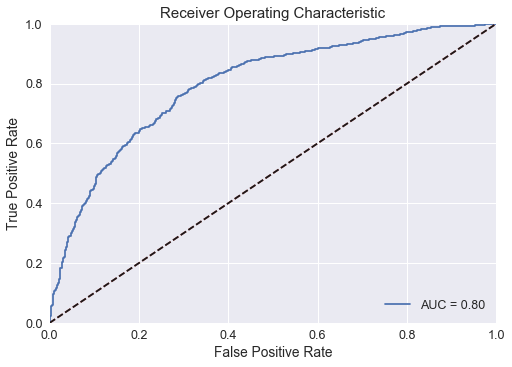

In [182]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Calculating Lift Score
*Lift measures the degree to which the predictions of a classification model are better than randomly-generated predictions.*

In [183]:
from mlxtend.evaluate import lift_score
lift_score(y_test, final_pred.round())

1.4790358384204223

### Thresholds and Accuracy  Statistics - Ensemble Model

In [185]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
376,0.477674,0.734284
378,0.477626,0.734284
381,0.475673,0.734284
403,0.465988,0.733756
375,0.477681,0.733756


### Feature importance

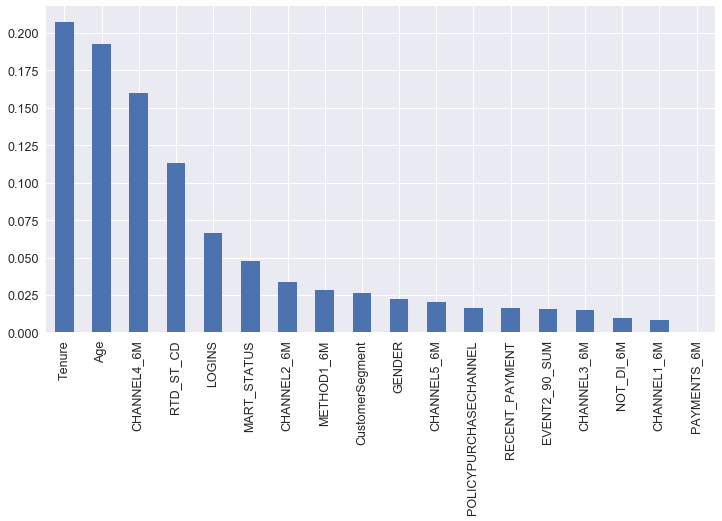

In [186]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

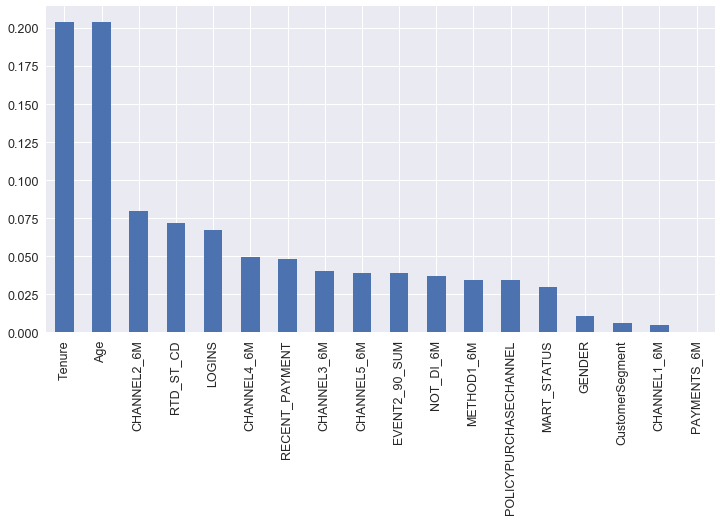

In [187]:
importance = pd.Series(xgb_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

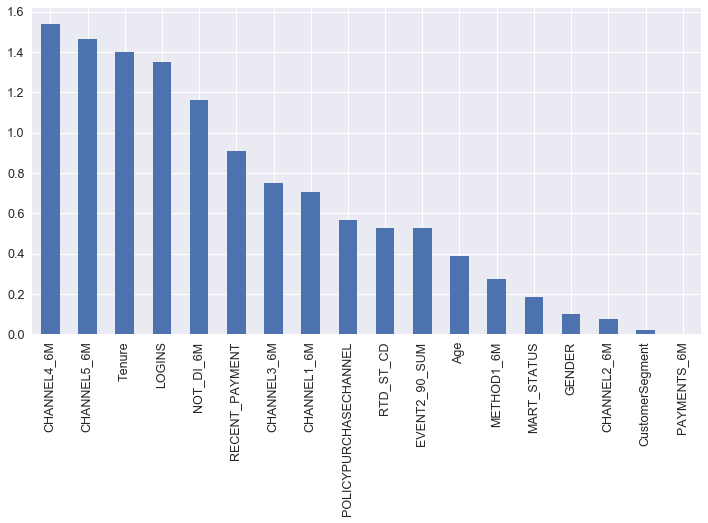

In [188]:
importance = pd.Series(np.abs(logit_model.coef_.ravel()))
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))